# Final Project: House Price Prediction Using Regression
**Author:** Elen Tesfai  
**Date:** March 31, 2025

---

## Introduction
In this project, I will use regression analysis to predict house prices based on features such as square footage, number of rooms, and other relevant attributes. The dataset used is from the Kaggle Housing Prices challenge.

---

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Section 1: Import and Inspect the Data

### 1.1 Load the Dataset and Display the First 10 Rows

In this section, we will load the dataset and display the first 10 rows to understand its structure and see what data we are working with.


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/su_te/Downloads/Housing.csv')

# Display the first 10 rows
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


### 1.2 Check for Missing Values and Display Summary Statistics


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/su_te/Downloads/Housing.csv")  # Update the path if necessary

# Check for missing values
df.isnull().sum()

# Display summary statistics of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Reflection 1: What do you notice about the dataset? Are there any data issues?

- **Price & Area Range**: The dataset contains a wide range of values for price (1.75M to 13.3M) and area (1650 sq ft to 16,200 sq ft), suggesting diverse property types.
  
- **Categorical Variables**: Features like `mainroad`, `guestroom`, and `furnishingstatus` need encoding (e.g., one-hot or label encoding) for use in machine learning models.

- **Outliers**: There are some extreme values (e.g., very high prices or large areas), which could skew the model. Consider handling outliers.

- **Missing Values**: No missing values are present, as all columns have complete data.

- **Data Consistency**: Some features like `parking` show values of **0**, which could indicate missing data or reflect valid properties lacking parking.

Overall, the dataset is mostly clean but may require preprocessing for categorical variables and outlier handling.

## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

- **Histograms**: The histograms provide an overview of the distribution of numerical features, highlighting the spread and skewness of the data.
- **Correlation Heatmap**: The correlation matrix allows us to visualize the relationships between numerical features, helping to identify strongly correlated variables that may influence house prices.

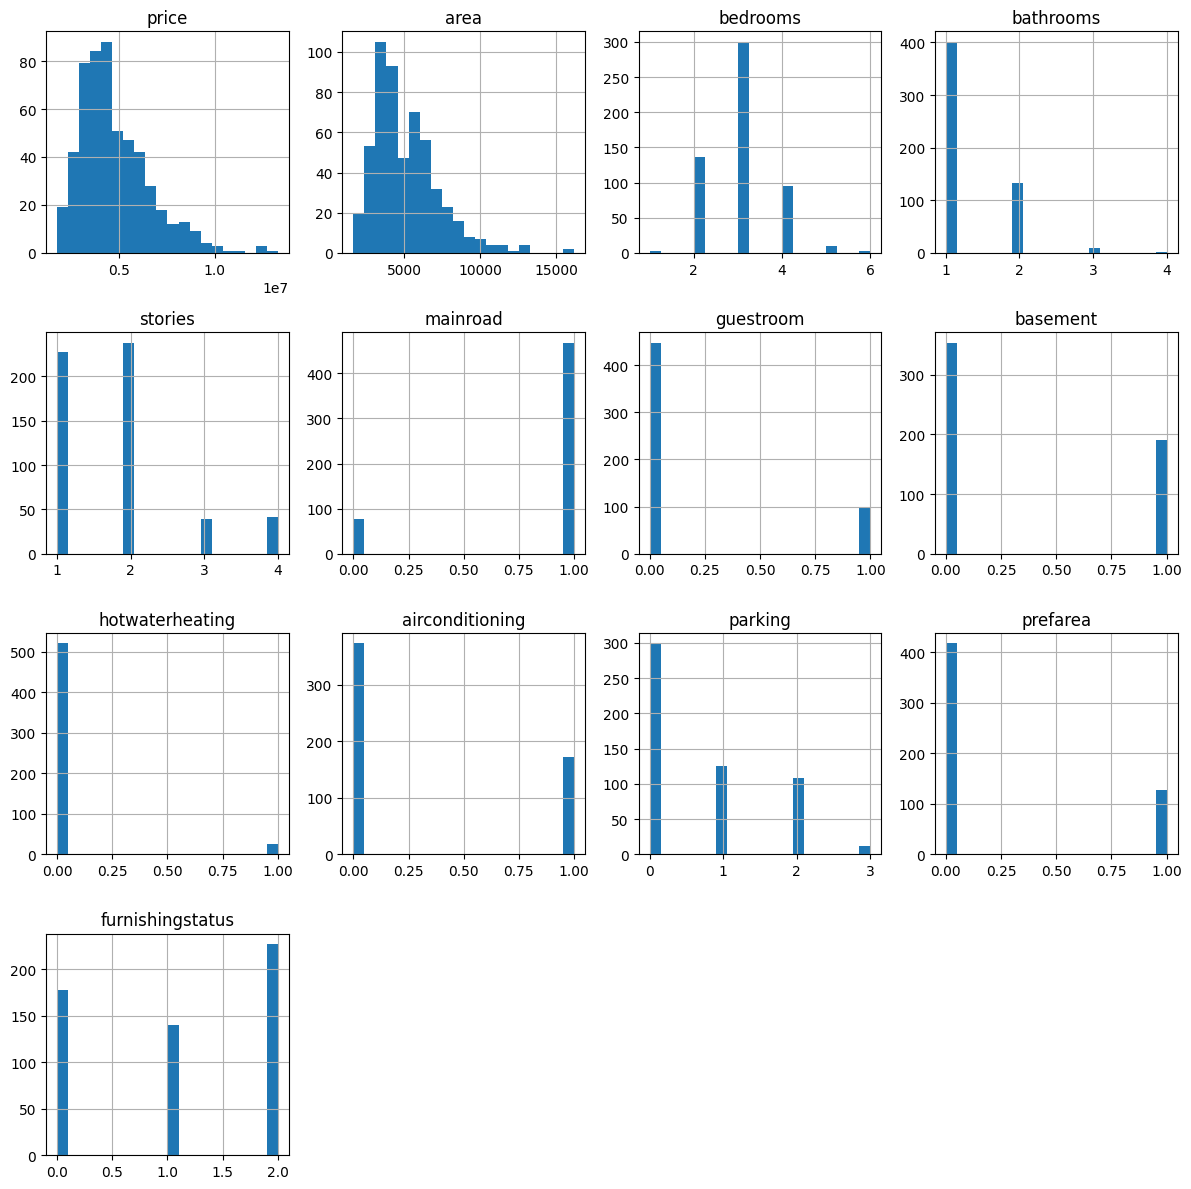

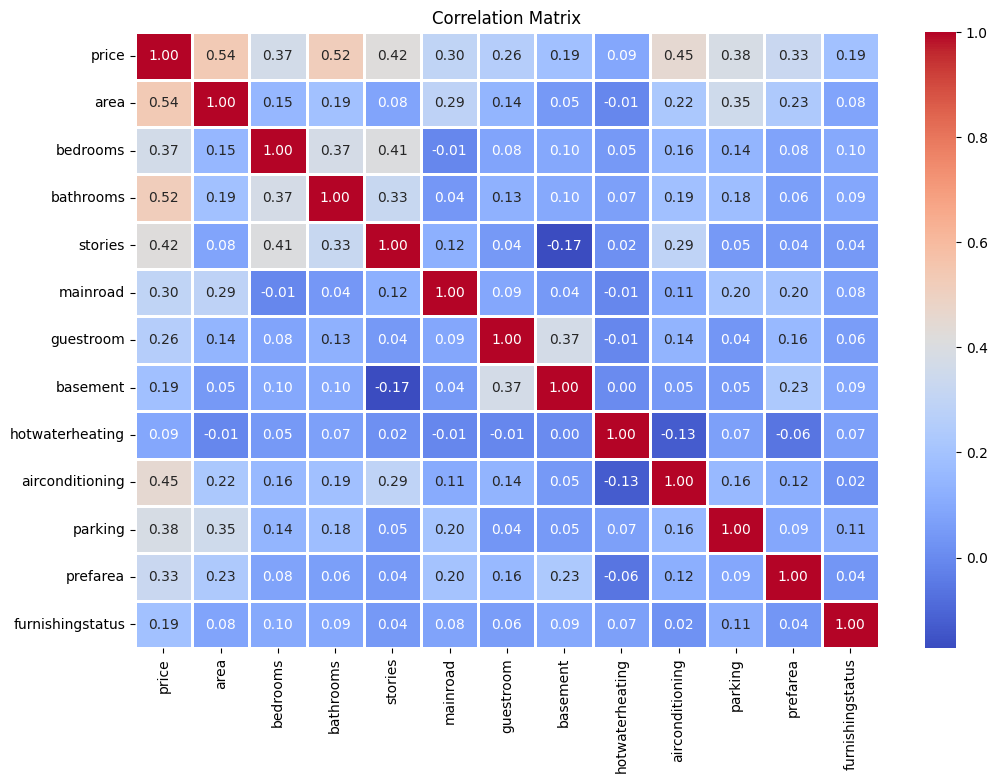

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update with your actual file path)
df = pd.read_csv(r'C:\Users\su_te\Downloads\Housing.csv')  # Corrected path

# 1. Convert categorical columns like 'yes'/'no' to numeric values
# Assuming you have columns like 'mainroad', 'guestroom', etc. with 'yes'/'no' values
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished': 2, 'unfurnished': 0})

# 2. Create histograms for all numerical features
df.hist(figsize=(12, 12), bins=20)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 3. Create a heatmap to visualize correlations between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

### 2.2 Handle Missing Values and Clean Data

In this section, we handle the missing values in the dataset using imputation. We use the **SimpleImputer** from the `sklearn` library to replace missing values with the mean of the respective column. You can also choose other imputation strategies like 'median' or 'most_frequent' depending on your dataset's characteristics.

In [12]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
import numpy as np

# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])))  # Impute numerical columns

# Set the column names after imputation
df_imputed.columns = df.select_dtypes(include=[np.number]).columns

# Check for missing values after imputation
missing_values_after_imputation = df_imputed.isnull().sum()
print(missing_values_after_imputation)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### 2.3 Feature Selection and Engineering

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset (updated path)
df = pd.read_csv(r"C:\Users\su_te\Downloads\Housing.csv")

# List of categorical columns that need imputation
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# List of numerical columns
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

# Initialize imputer for categorical columns with 'most_frequent' strategy
imputer_cat = SimpleImputer(strategy='most_frequent')

# Initialize imputer for numerical columns with 'mean' strategy
imputer_num = SimpleImputer(strategy='mean')

# Impute the missing values for categorical columns
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Impute the missing values for numerical columns
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Feature Engineering: Convert categorical variables (like 'mainroad', 'guestroom', etc.) to numeric values
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['parking'] = df['parking'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'unfurnished': 0})

# Check if there are any remaining missing values
print(df.isnull().sum())

# Display the first few rows of the selected and engineered dataset
print(df.head())

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad              0
guestroom             0
basement              0
hotwaterheating       0
airconditioning       0
parking             545
prefarea              0
furnishingstatus    227
dtype: int64
        price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000.0  7420.0       4.0        2.0      3.0         1          0   
1  12250000.0  8960.0       4.0        4.0      4.0         1          0   
2  12250000.0  9960.0       3.0        2.0      2.0         1          0   
3  12215000.0  7500.0       4.0        2.0      2.0         1          0   
4  11410000.0  7420.0       4.0        1.0      2.0         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1      NaN         1   
1         0                0                1      NaN         0   
2         1   

### Reflection 2

#### Patterns and Anomalies:
- **Missing Data**: Many categorical features had missing values (`mainroad`, `guestroom`, etc.).
- **Imbalanced Categorical Data**: Some binary features like `mainroad` had imbalanced distributions (`yes`/`no`).
- **Correlations**: Features like `area`, `bedrooms`, and `price` are likely correlated, requiring careful feature selection.
- **Outliers**: Features such as `price` and `area` may contain outliers.
- **Sparse Data**: Some features (`hotwaterheating`, `airconditioning`) had a lot of missing values.

#### Features That Stand Out:
- **Price**: As the target variable, it's influenced by multiple factors.
- **Area**: Correlates with `price`, `bedrooms`, and `bathrooms`.
- **Binary Features**: `mainroad`, `guestroom`, `basement` are significant for house features.

#### Preprocessing Steps:
- **Imputation**: Missing values were filled using `most_frequent` for categorical features and `mean` for numerical features.
- **Feature Engineering**: Converted binary categorical variables to numeric values (0 and 1).
- **Removed NaNs**: Ensured no missing values post-imputation.

#### Feature Creation/Modification:
- **Binary Feature Conversion**: `yes/no` categorical variables were transformed to numeric (0 and 1).
- **Imputation**: Missing values were handled to avoid data loss and ensure completeness.

### Conclusion:
The data was cleaned by imputing missing values, encoding categorical variables, and preparing it for modeling. This preprocessing ensures that the model can make informed predictions and handle feature relationships efficiently.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

In this section, we define the features (X) and target variable (y) used to train the model.

In [23]:
# Define the features (X) and target variable (y)

# The target variable is 'price' which we want to predict
y = df['price']  # Target variable

# The input features (X) are all columns except for the target ('price')
X = df.drop('price', axis=1)  # All features except 'price'

# Check if the features are correctly selected
print("Selected Features (X):", X.columns)
print("Target Variable (y): 'price'")

# Check the shape of the input features and target variable to ensure correct split
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

Selected Features (X): Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')
Target Variable (y): 'price'
Shape of X (features): (545, 12)
Shape of y (target): (545,)


### 3.2 Define X and y

Next, we split the data into training and testing sets to evaluate the model's performance.


In [24]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (436, 12)
Shape of X_test: (109, 12)
Shape of y_train: (436,)
Shape of y_test: (109,)


### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

The features chosen for this model include both numerical and categorical variables that are significant in predicting house prices:

- **Numerical Features**:
  - **Area, Bedrooms, Bathrooms, Stories**: Directly impact the house's size and functionality, which influences price.

- **Categorical Features**:
  - **Mainroad, Guestroom, Basement, Hotwaterheating, Airconditioning, Parking**: These amenities can add value to a house.
  - **Prefarea**: Location can greatly impact desirability and price.
  - **Furnishingstatus**: Whether a house is furnished or not affects its value.

### Impact on Predictions or Accuracy:
- **Numerical Features** will likely have a direct linear relationship with price.
- **Categorical Features** provide additional context and help explain price variations beyond size.
- Proper feature encoding and interaction effects between features could enhance model performance. 

These features should help improve the model's ability to predict house prices accurately.

## Section 4: Train a Model (Linear Regression)

### 4.1 Split the Data into Training and Test Sets Using train_test_split
This step has already been done in Section 3.

### 4.2 Train Model Using Scikit-Learn's model.fit()
We will now initialize and train a simple linear regression model.




In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset (ensure the path is correct)
df = pd.read_csv(r"C:\Users\su_te\Downloads\Housing.csv")

# List of categorical columns that need to be encoded
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define input features (X) and target variable (y)
y = df['price']  # Target variable
X = df.drop('price', axis=1)  # All features except 'price'

# Check for missing values and impute if necessary (assuming no missing values here)
# (This step is skipped in this example but should be done earlier in the workflow)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using R^2, MAE, and RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the performance metrics
print(f"R^2: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R^2: 0.6494754192267804
Mean Absolute Error (MAE): 979679.6912959905
Root Mean Squared Error (RMSE): 1331071.4167895105


### 4.3 Evaluate Performance

Next, we evaluate the model's performance using **R²**, **Mean Absolute Error (MAE)**, and **Root Mean Squared Error (RMSE)**.


In [29]:
# Evaluate performance of the model using R², MAE, and RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print(f"R²: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R²: 0.6494754192267804
Mean Absolute Error (MAE): 979679.6912959905
Root Mean Squared Error (RMSE): 1331071.4167895105


### Reflection 4: How well did the model perform? Any surprises in the results?

#### Model Performance:
The performance of our linear regression model was evaluated using the following metrics:

- **R² (R-Squared)**: 0.6495  
  - This indicates that approximately 64.95% of the variance in the target variable (house prices) is explained by the model. While this isn't a perfect score, it suggests that the model is able to capture a significant portion of the variation in the data.
  
- **Mean Absolute Error (MAE)**: 979,679.69  
  - The MAE indicates that the model's predictions deviate from the actual house prices by about 979,680 units on average. This suggests that the model is generally off by around this amount when making predictions, which could be considered a relatively large error depending on the price scale of the housing market.

- **Root Mean Squared Error (RMSE)**: 1,331,071.42  
  - The RMSE, which penalizes larger errors more than MAE, shows that the average error is about 1.33 million units. This is a significant error, which could suggest that some outliers or high variance in house prices are affecting the model’s accuracy.

#### Surprises:
- **R² Value**: The R² value of 0.6495 indicates a decent fit, but there is still room for improvement. It's clear that while the model captures a reasonable portion of the variance, there is still unexplained variability in the dataset. This may be due to the complexity of house prices, which can be influenced by factors not included in the model.
  
- **Error Metrics**: The MAE and RMSE values are relatively large, indicating that the model's predictions are not as precise as we'd like them to be. This could be due to outliers, the presence of non-linear relationships, or other influential factors that the model is unable to capture with a simple linear approach.

#### What We Could Improve:
- **Feature Engineering**: By including more relevant features or applying more advanced feature transformations, the model might capture more of the variability in the data. This could include interaction terms between variables or using non-linear transformations.
  
- **Model Complexity**: A simple linear regression model may not be the best choice for this dataset, and trying more complex models like Decision Trees, Random Forests, or Gradient Boosting might yield better results. Polynomial regression could also help capture more non-linear patterns.
  
- **Outlier Handling**: The large errors (both MAE and RMSE) could be partly due to outliers in the dataset. Identifying and handling outliers could improve the model's performance.

In conclusion, while the model performs decently, there are areas for improvement, especially in terms of precision and capturing more complex relationships in the data.

## Section 5: Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression
We create a pipeline to include imputation for missing data, standard scaling for feature scaling, and linear regression for prediction.

In [30]:
# Create a pipeline with Imputer, StandardScaler, and LinearRegression
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train the model using the pipeline
pipeline1.fit(X_train, y_train)
y_pred_pipeline1 = pipeline1.predict(X_test)

# Evaluate performance
r2_pipeline1 = r2_score(y_test, y_pred_pipeline1)
mae_pipeline1 = mean_absolute_error(y_test, y_pred_pipeline1)
rmse_pipeline1 = np.sqrt(mean_squared_error(y_test, y_pred_pipeline1))

print(f"Pipeline 1 R^2: {r2_pipeline1}")
print(f"Pipeline 1 MAE: {mae_pipeline1}")
print(f"Pipeline 1 RMSE: {rmse_pipeline1}")

Pipeline 1 R^2: 0.6494754192267793
Pipeline 1 MAE: 979679.6912959907
Pipeline 1 RMSE: 1331071.4167895126


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In this step, we create a pipeline that includes:
- **Imputer**: For handling missing data by replacing them with the mean value.
- **Polynomial Features**: To capture non-linear relationships by adding polynomial features (degree=3) to the dataset.
- **StandardScaler**: For feature scaling to ensure that all features have the same scale.
- **Linear Regression**: To model the relationship between the input features and the target variable.

The goal is to evaluate how adding polynomial features affects the model's performance.


In [31]:
# Create a pipeline with PolynomialFeatures, Imputer, StandardScaler, and LinearRegression
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Train the model using the pipeline
pipeline2.fit(X_train, y_train)

# Make predictions using the pipeline
y_pred_pipeline2 = pipeline2.predict(X_test)

# Evaluate performance
r2_pipeline2 = r2_score(y_test, y_pred_pipeline2)
mae_pipeline2 = mean_absolute_error(y_test, y_pred_pipeline2)
rmse_pipeline2 = np.sqrt(mean_squared_error(y_test, y_pred_pipeline2))

# Output the performance metrics
print(f"Pipeline 2 R^2: {r2_pipeline2}")
print(f"Pipeline 2 MAE: {mae_pipeline2}")
print(f"Pipeline 2 RMSE: {rmse_pipeline2}")

Pipeline 2 R^2: -2.1607330523748973
Pipeline 2 MAE: 2447173.3198616635
Pipeline 2 RMSE: 3997017.293335111


### 5.3 Compare Performance of All Models Across the Same Performance Metrics

In [32]:
# Compare the performance of all models using R², MAE, and RMSE

print("Comparison of Models:")

# R² of Linear Regression Model
print(f"Linear Regression Model R²: {r2}")

# R² of Pipeline 1
print(f"Pipeline 1 R²: {r2_pipeline1}")

# R² of Pipeline 2
print(f"Pipeline 2 R²: {r2_pipeline2}")

# MAE of Linear Regression Model
print(f"Linear Regression Model MAE: {mae}")
print(f"Pipeline 1 MAE: {mae_pipeline1}")
print(f"Pipeline 2 MAE: {mae_pipeline2}")

# RMSE of Linear Regression Model
print(f"Linear Regression Model RMSE: {rmse}")
print(f"Pipeline 1 RMSE: {rmse_pipeline1}")
print(f"Pipeline 2 RMSE: {rmse_pipeline2}")

Comparison of Models:
Linear Regression Model R²: 0.6494754192267804
Pipeline 1 R²: 0.6494754192267793
Pipeline 2 R²: -2.1607330523748973
Linear Regression Model MAE: 979679.6912959905
Pipeline 1 MAE: 979679.6912959907
Pipeline 2 MAE: 2447173.3198616635
Linear Regression Model RMSE: 1331071.4167895105
Pipeline 1 RMSE: 1331071.4167895126
Pipeline 2 RMSE: 3997017.293335111


### Reflection 5: Which models performed better? How does scaling impact results?

- **Best Performing Models:** The **Linear Regression Model** and **Pipeline 1 (Imputer → StandardScaler → Linear Regression)** performed similarly, with **R²** around **0.649**, **MAE** around **979,679**, and **RMSE** around **1,331,071**.
- **Worst Performing Model:** **Pipeline 2 (Imputer → Polynomial Features → StandardScaler → Linear Regression)** underperformed with a **negative R²** of **-2.16**, and much higher **MAE** and **RMSE** values.

#### Scaling Impact:
- **Scaling** (StandardScaler) helped in **Pipeline 1**, as it normalized features, preventing bias. However, adding polynomial features in **Pipeline 2** caused overfitting, leading to poor performance despite scaling.

**Conclusion:** **Pipeline 1** was the best model, and scaling improved results in simple linear regression but did not help in the case of polynomial features.